# Introduction

This notebook is about using the GLasso algorithm

I will use the scikit learn version of it, with automated cross validation.

In [1]:
import pandas as pd
from sklearn.covariance import GraphLasso,GraphLassoCV,EmpiricalCovariance
import numpy as np
from numpy.linalg import inv
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [78]:
df_mc=pd.read_csv("data/X_test.csv",header=None)
df_mc=df_mc.rename(columns={0:"x1",1:"x2",2:"x3",3:"x4"})

In [79]:
df_mc.head()

,x1,x2,x3,x4
0,-0.199058,0.155569,-0.067543,1.434591
1,0.309032,-0.046133,-1.785380,0.681475
2,0.097170,-0.376027,0.327607,-0.814160
3,-1.237077,-1.328336,1.955127,-1.544141
4,1.161363,1.067888,0.022330,0.603614


In [80]:
df_mc.describe()

,x1,x2,x3,x4
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,-1.643130e-17,-5.984102e-17,1.144917e-16,1.104672e-17
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-2.991931e+00,-3.013649e+00,-3.469819e+00,-3.652721e+00
25%,-7.167359e-01,-7.111839e-01,-6.850007e-01,-6.896844e-01
50%,3.082600e-02,-4.174440e-03,-4.400892e-03,-1.310217e-02
75%,7.093195e-01,6.905593e-01,6.593350e-01,6.756227e-01
max,3.198116e+00,3.164379e+00,2.749569e+00,3.101828e+00


Now let's fit a cross validated graph lasso estimator

In [81]:
glasso=GraphLassoCV()
glasso.fit(df_mc)

GraphLassoCV(alphas=4, assume_centered=False, cv=None, enet_tol=0.0001,
       max_iter=100, mode='cd', n_jobs=1, n_refinements=4, tol=0.0001,
       verbose=False)

In [82]:
glasso.covariance_

array([[ 1.        ,  0.82703486, -0.441698  ,  0.38985575],
       [ 0.82703486,  1.        , -0.5340743 ,  0.47138974],
       [-0.441698  , -0.5340743 ,  1.        , -0.23098084],
       [ 0.38985575,  0.47138974, -0.23098084,  1.        ]])

In [83]:
glasso.score(df_mc)

-4.7938536946241177

Let's compare this to the empirical estimate

In [84]:
empir=EmpiricalCovariance()
empir.fit(df_mc)

EmpiricalCovariance(assume_centered=False, store_precision=True)

In [85]:
empir.covariance_

array([[ 1.        ,  0.82999523, -0.4436062 ,  0.38911997],
       [ 0.82999523,  1.        , -0.5370343 ,  0.47434828],
       [-0.4436062 , -0.5370343 ,  1.        , -0.22802231],
       [ 0.38911997,  0.47434828, -0.22802231,  1.        ]])

In [86]:
empir.score(df_mc)

-4.7936693172926006

In [87]:
glasso.precision_

array([[ 3.16444025, -2.61709701,  0.        ,  0.        ],
       [-2.61709701,  3.86855295,  0.7654137 , -0.62650733],
       [ 0.        ,  0.7654137 ,  1.40014864, -0.03740066],
       [ 0.        , -0.62650733, -0.03740066,  1.2866903 ]])

In [88]:
empir.precision_

array([[ 3.21467536, -2.68291724, -0.01034892,  0.01938299],
       [-2.68291724,  3.96036661,  0.78731884, -0.65509013],
       [-0.01034892,  0.78731884,  1.40715026, -0.04857471],
       [ 0.01938299, -0.65509013, -0.04857471,  1.29212245]])

So it would seem like the data describes the following graph model:

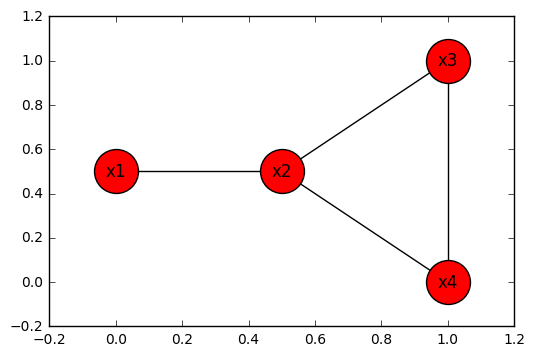

In [89]:
G = nx.Graph()
G.add_edges_from([('x1', 'x2'), ('x2', 'x3'), ('x2', 'x4'), ('x3', 'x4')])

pos={'x1': [ 0.,  0.5],
 'x2': [ 0.5,  0.5],
 'x3': [ 1.0,  1.0],
 'x4': [ 1.,  0.]}

node_labels={node:node for node in G.nodes()}
nx.draw_networkx_labels(G, pos, labels=node_labels)
nx.draw_networkx_nodes(G, pos,node_size=1000)#, cmap=plt.get_cmap('jet'), node_color = values)
nx.draw_networkx_edges(G, pos)# #edgelist=G.edges()

### playing with regularization and making it more sparse in the following

In [90]:
glasso_reg=GraphLasso(alpha=0.5)

In [91]:
glasso_reg.fit(df_mc)

GraphLasso(alpha=0.5, assume_centered=False, enet_tol=0.0001, max_iter=100,
      mode='cd', tol=0.0001, verbose=False)

In [92]:
glasso_reg.precision_

array([[ 1.12220454, -0.37032215,  0.        , -0.        ],
       [-0.37032215,  1.12357797,  0.03708516, -0.        ],
       [ 0.        ,  0.03708516,  1.00137342,  0.        ],
       [-0.        , -0.        ,  0.        ,  1.        ]])